In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [28]:
df_agosto = pd.read_csv('../data/Agosto/Ana Health_Tabela Modelo Previsão Churn - Tabela até 08_23.csv', skiprows=1)
df_julho = pd.read_csv('../data/Julho/Ana Health_Tabela Modelo Previsão Churn - Tabela até 07_23.csv', skiprows=1)
df_junho = pd.read_csv('../data/Junho/Ana Health_Tabela Modelo Previsão Churn - Tabela até 06_23.csv', skiprows=1)
df_novembro = pd.read_csv('../data/Novembro/Ana Health_Tabela Modelo Previsão Churn - Tabela Geral.csv', skiprows=1)
df_outubro = pd.read_csv('../data/Outubro/Ana Health_Tabela Modelo Previsão Churn - Tabela até 10_23.csv', skiprows=1)
df_setembro = pd.read_csv('../data/Setembro/Ana Health_Tabela Modelo Previsão Churn - Tabela até 09_23.csv', skiprows=1)

In [29]:
import script_dataframe
import importlib
importlib.reload(script_dataframe)
tratamento = script_dataframe.tratamento

df_agosto = tratamento(df_agosto)
df_julho = tratamento(df_julho)
df_junho = tratamento(df_junho)
df_novembro = tratamento(df_novembro)
df_outubro = tratamento(df_outubro)
df_setembro = tratamento(df_setembro)

In [30]:
def prox_status(df1, df2):
    for i in range(len(df1)):
        user_id = df1['id_person'].iloc[i]
        if user_id in df2['id_person'].values:
            index = df2[df2['id_person'] == user_id].index[0]
            if df2['status'][index] == 'won':
                df1.loc[i, 'status_prox_mes'] = 'won'
            else:
                df1.loc[i, 'status_prox_mes'] = 'lost'
        else:
            df1.loc[i, 'status_prox_mes'] = None


lista_df = [df_junho, df_julho, df_agosto, df_setembro, df_outubro, df_novembro]
for i in range(len(lista_df)-1):
    prox_status(lista_df[i], lista_df[i+1])

In [31]:
df_novembro

,id_person,birthdate,id_gender,id_marrital_status,id_health_plan,contract_start_date,contract_end_date,id_continuity_pf,Canal de Preferência,notes_count,...,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos,Tempo até Sair,Tempo Última Mensagem Inbound,Tempo Última Mensagem Outbound,Quem Enviou Última Mensagem
24,483,76.0,64.0,80.0,453.0,2021-01-27,2023-08-26,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,941.0,178.0,69.0,Cliente
68,1259,31.0,64.0,82.0,NaN,2021-05-10,2022-09-09,338.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,487.0,488.0,386.0,Cliente
37,972,37.0,63.0,82.0,932.0,2021-06-28,2023-09-16,339.0,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,810.0,62.0,62.0,Empresa
38,973,37.0,64.0,80.0,412.0,2021-06-28,2022-02-07,339.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,224.0,679.0,679.0,Empresa
39,974,36.0,63.0,80.0,NaN,2021-06-28,2022-08-16,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,414.0,579.0,492.0,Cliente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,5944,22.0,64.0,80.0,NaN,2023-11-06,NaT,NaN,239.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empresa
1196,5948,33.0,64.0,80.0,NaN,2023-11-07,NaT,NaN,NaN,0,...,Cartão de crédito,50.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Empresa
1197,5949,26.0,64.0,80.0,NaN,2023-11-07,NaT,NaN,239.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empresa
1199,5954,53.0,63.0,82.0,NaN,2023-11-07,NaT,NaN,239.0,0,...,Cartão de crédito,120.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Empresa


In [32]:
colunas = ['birthdate', 'id_gender', 'id_marrital_status',
       'id_health_plan', 'contract_start_date', 'contract_end_date',
       'done_activities_count', 'status', 'start_of_service', 'lost_time',
       'add_time', 'id_label', 'Qde Atendimento Médico', 'Faltas Atendimento Médico',
       'Qde Atendimentos Acolhimento', 'Faltas Acolhimento',
       'Qde Psicoterapia', 'Faltas Psicoterapia', 'Físico', 'Psicológico',
       'Social', 'Ambiental', 'Problemas Abertos', 'Mensagens Inbound',
       'Mensagens Outbound', 'Ligações Inbound', 'Ligações Outbound', 'Qde Total de Faturas',
       'Qde Total de Tentativas de Cobrança', 'Método de Pagamento',
       'Valor Médio da Mensalidade',
       'Qde Total de Faturas Pagas após Vencimento',
       'Qde Total de Faturas Inadimpletes', 'Valor Total Inadimplência',
       'Qde Perfis de Pagamento Inativos', 'Tempo Última Mensagem Inbound',
       'Tempo Última Mensagem Outbound', 'Quem Enviou Última Mensagem']

df_novembro[colunas]

,birthdate,id_gender,id_marrital_status,id_health_plan,contract_start_date,contract_end_date,done_activities_count,status,start_of_service,lost_time,...,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos,Tempo Última Mensagem Inbound,Tempo Última Mensagem Outbound,Quem Enviou Última Mensagem
24,76.0,64.0,80.0,453.0,2021-01-27,2023-08-26,10,lost,306.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,69.0,Cliente
68,31.0,64.0,82.0,NaN,2021-05-10,2022-09-09,11,lost,933.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,488.0,386.0,Cliente
37,37.0,63.0,82.0,932.0,2021-06-28,2023-09-16,14,lost,884.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,62.0,Empresa
38,37.0,64.0,80.0,412.0,2021-06-28,2022-02-07,6,lost,884.0,660.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,679.0,679.0,Empresa
39,36.0,63.0,80.0,NaN,2021-06-28,2022-08-16,9,lost,884.0,470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579.0,492.0,Cliente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,22.0,64.0,80.0,NaN,2023-11-06,NaT,0,won,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empresa
1196,33.0,64.0,80.0,NaN,2023-11-07,NaT,0,won,22.0,NaN,...,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,NaN,NaN,NaN,Empresa
1197,26.0,64.0,80.0,NaN,2023-11-07,NaT,0,won,22.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empresa
1199,53.0,63.0,82.0,NaN,2023-11-07,NaT,0,won,22.0,NaN,...,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,NaN,NaN,NaN,Empresa


<AxesSubplot:>

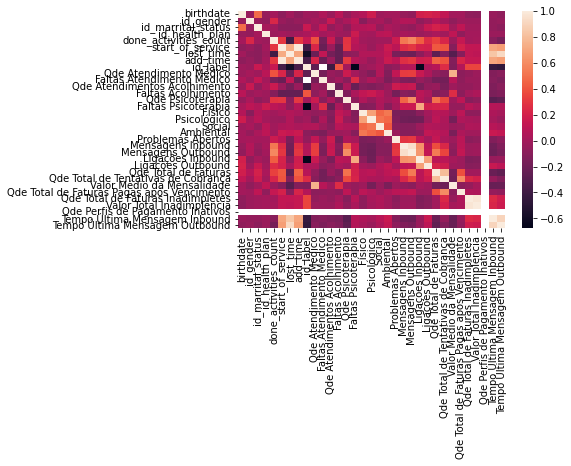

In [33]:
corr = df_novembro[colunas].corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [34]:
df_novembro['contract_end_date']

24     2023-08-26
68     2022-09-09
37     2023-09-16
38     2022-02-07
39     2022-08-16
          ...    
1195          NaT
1196          NaT
1197          NaT
1199          NaT
1200          NaT
Name: contract_end_date, Length: 1032, dtype: datetime64[ns]